## Exploratory Data Analysis and Regression Notebook

Import the necessary libraries.

In [1]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
from scipy import stats
import pandas_profiling as pp
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/automobile-dataset/Automobile_data.csv


In [3]:
df=pd.read_csv("/kaggle/input/automobile-dataset/Automobile_data.csv")
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19     3.4              10.0        102      5500       24   
4         mpfi  3.19     3.4               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [4]:
# numbers of columns and rows in dataset.
df.shape

(205, 26)

In [5]:
# Name of the columns of the dataset.
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
# Datatypes of every column for the dataset.
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [7]:
# Information(no of rows and columns, datatypes for the columns , null values in dataframe memory usage) about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

**Data cleaning**

 There are lots of '?' sign in the dataset. These are the missing data. We have to handle the missing data . So first of all we will replace "?" by nan because pandas does not consider "?" as missing value . We can see in `df.info()` method all variables showing that there are not any missing values. After replcing pandas can count the missing values.

In [8]:
#replace ? with the nan
df.replace("?",np.nan,inplace =True)
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   
2          1               NaN  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19     3.4              10.0        102      5500       24   
4         mpfi  3.19     3.4               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-nul

In [10]:
# sum of null values in every columns.
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [11]:
# no of duplicated rows in data frames
df.duplicated().value_counts()

False    205
dtype: int64

"num-of-doors","normalized-losses","bore","stroke","horsepower","peak-rpm","price" these features have the missing values.

we replace the missing values by mean value  for all variable except "num-of-doors". This variable missing values will be replace by most frequency value.


In [12]:
#Count the unique values in num-of-doors
Counter(df["num-of-doors"])

Counter({'two': 89, 'four': 114, nan: 2})

Replace null values with the mean of the feature for the numeric variables and for categorical variables replace null value with the maximum count.

In [13]:
miss_col= ["normalized-losses","bore","stroke","horsepower","peak-rpm","price"]
for col in miss_col:
    df[col].replace(np.nan,df[col].astype("float").mean(axis=0),inplace=True)
    
df["num-of-doors"].replace(np.nan,df["num-of-doors"].value_counts().idxmax(),inplace=True)
df.head().T
    

0            1            2      3      4
symboling                    3            3            1      2      2
normalized-losses          122          122          122    164    164
make               alfa-romero  alfa-romero  alfa-romero   audi   audi
fuel-type                  gas          gas          gas    gas    gas
aspiration                 std          std          std    std    std
num-of-doors               two          two          two   four   four
body-style         convertible  convertible    hatchback  sedan  sedan
drive-wheels               rwd          rwd          rwd    fwd    4wd
engine-location          front        front        front  front  front
wheel-base                88.6         88.6         94.5   99.8   99.4
length                   168.8        168.8        171.2  176.6  176.6
width                     64.1         64.1         65.5   66.2   66.4
height                    48.8         48.8         52.4   54.3   54.3
curb-weight               2548         2548         2823   2337   2824
engine-type               dohc         dohc         ohcv    ohc    ohc
num-of-cylinders          four         four          six   four   five
engine-size                130          130          152    109    136
fuel-system               mpfi         mpfi         mpfi   mpfi   mpfi
bore                      3.47         3.47         2.68   3.19   3.19
stroke                    2.68         2.68         3.47    3.4    3.4
compression-ratio            9            9            9     10      8
horsepower                 111          111          154    102    115
peak-rpm                  5000         5000         5000   5500   5500
city-mpg                    21           21           19     24     18
highway-mpg                 27           27           26     30     22
price                    13495        16500        16500  13950  17450

In [14]:
print("Data Types of Variables \n",df.dtypes)

Data Types of Variables 
 symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


change the appropriate data type.

In [15]:
# correct the data format.
df[["normalized-losses","bore","stroke","horsepower","peak-rpm","price"]]=df[["normalized-losses","bore","stroke","horsepower","peak-rpm","price"]].astype("float")
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [16]:
pp.ProfileReport(df)

**Statistical Data discription**

In [17]:
#Statistical discription of the data for numerical features.
df.describe()

symboling  normalized-losses  wheel-base      length       width  \
count  205.000000         205.000000  205.000000  205.000000  205.000000   
mean     0.834146         122.000000   98.756585  174.049268   65.907805   
std      1.245307          31.681008    6.021776   12.337289    2.145204   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000         101.000000   94.500000  166.300000   64.100000   
50%      1.000000         122.000000   97.000000  173.200000   65.500000   
75%      2.000000         137.000000  102.400000  183.100000   66.900000   
max      3.000000         256.000000  120.900000  208.100000   72.300000   

           height  curb-weight  engine-size        bore      stroke  \
count  205.000000   205.000000   205.000000  205.000000  205.000000   
mean    53.724878  2555.565854   126.907317    3.329751    3.255423   
std      2.443522   520.680204    41.642693    0.270844    0.313597   
min     47.800000  1488.000000    61.000000    2.540000    2.070000   
25%     52.000000  2145.000000    97.000000    3.150000    3.110000   
50%     54.100000  2414.000000   120.000000    3.310000    3.290000   
75%     55.500000  2935.000000   141.000000    3.580000    3.410000   
max     59.800000  4066.000000   326.000000    3.940000    4.170000   

       compression-ratio  horsepower     peak-rpm    city-mpg  highway-mpg  \
count         205.000000  205.000000   205.000000  205.000000   205.000000   
mean           10.142537  104.256158  5125.369458   25.219512    30.751220   
std             3.972040   39.519211   476.979093    6.542142     6.886443   
min             7.000000   48.000000  4150.000000   13.000000    16.000000   
25%             8.600000   70.000000  4800.000000   19.000000    25.000000   
50%             9.000000   95.000000  5200.000000   24.000000    30.000000   
75%             9.400000  116.000000  5500.000000   30.000000    34.000000   
max            23.000000  288.000000  6600.000000   49.000000    54.000000   

              price  
count    205.000000  
mean   13207.129353  
std     7868.768212  
min     5118.000000  
25%     7788.000000  
50%    10595.000000  
75%    16500.000000  
max    45400.000000

In [18]:
#Statistical discription of the data for categorical features.
df.describe(include='object')

make fuel-type aspiration num-of-doors body-style drive-wheels  \
count      205       205        205          205        205          205   
unique      22         2          2            2          5            3   
top     toyota       gas        std         four      sedan          fwd   
freq        32       185        168          116         96          120   

       engine-location engine-type num-of-cylinders fuel-system  
count              205         205              205         205  
unique               2           7                7           8  
top              front         ohc             four        mpfi  
freq               202         148              159          94

**Standardisation**

In [19]:
df["city-L/100km"]=235/df["city-mpg"]
df["highway-L/100km"]=235/df["highway-mpg"]

In [20]:
df.drop(["city-mpg","highway-mpg"],axis=1)

symboling  normalized-losses         make fuel-type aspiration  \
0            3              122.0  alfa-romero       gas        std   
1            3              122.0  alfa-romero       gas        std   
2            1              122.0  alfa-romero       gas        std   
3            2              164.0         audi       gas        std   
4            2              164.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
200         -1               95.0        volvo       gas        std   
201         -1               95.0        volvo       gas      turbo   
202         -1               95.0        volvo       gas        std   
203         -1               95.0        volvo    diesel      turbo   
204         -1               95.0        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   
204         four        sedan          rwd           front       109.1  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0            130         mpfi  3.47    2.68               9.0      111.0   
1            130         mpfi  3.47    2.68               9.0      111.0   
2            152         mpfi  2.68    3.47               9.0      154.0   
3            109         mpfi  3.19    3.40              10.0      102.0   
4            136         mpfi  3.19    3.40               8.0      115.0   
..           ...          ...   ...     ...               ...        ...   
200          141         mpfi  3.78    3.15               9.5      114.0   
201          141         mpfi  3.78    3.15               8.7      160.0   
202          173         mpfi  3.58    2.87               8.8      134.0   
203          145          idi  3.01    3.40              23.0      106.0   
204          141         mpfi  3.78    3.15               9.5      114.0   

     peak-rpm    price  city-L/100km  highway-L/100km  
0      5000.0  13495.0     11.190476         8.703704  
1      5000.0  16500.0     11.190476         8.703704  
2      5000.0  16500.0     12.368421         9.038462  
3      5500.0  13950.0      9.791667         7.833333  
4      5500.0  17450.0     13.055556        10.681818  
..        ...      ...           ...              ...  
200    5400.0  16845.0     10.217391         8.392857  
201    5300.0  19045.0     12.368421         9.400000  
202    5500.0  21485.0     13.055556        10.217391  
203    4800.0  22470.0      9.038462         8.703704  
204    5400.0  22625.0     12.368421         9.400000  

[205 rows x 26 columns]

**Normalization**

In [21]:
for col in ["length","width","height"]:
    df[col]=df[col]/df[col].max()
    
df[["length","width","height"]].head()

length     width    height
0  0.811148  0.886584  0.816054
1  0.811148  0.886584  0.816054
2  0.822681  0.905947  0.876254
3  0.848630  0.915629  0.908027
4  0.848630  0.918396  0.908027

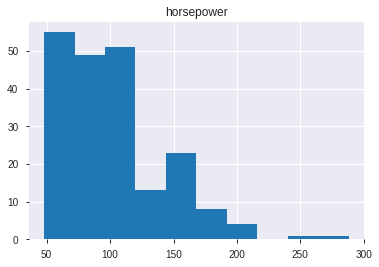

In [22]:

df[["horsepower"]].hist()
plt.show()

**Binning**

In [23]:
df["horsepower_binned"]=pd.cut(df["horsepower"],bins=np.linspace(min(df["horsepower"]),max(df["horsepower"]),4),
                               labels=["low","medium","high"],include_lowest=True)
df[["horsepower","horsepower_binned"]].head()

horsepower horsepower_binned
0       111.0               low
1       111.0               low
2       154.0            medium
3       102.0               low
4       115.0               low

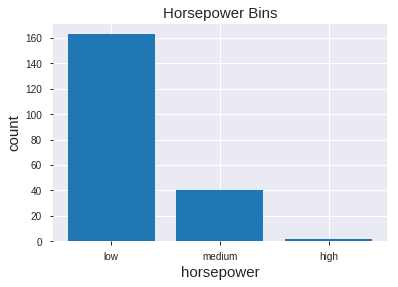

In [24]:
plt.bar(["low","medium","high"],df["horsepower_binned"].value_counts())
plt.xlabel("horsepower",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Horsepower Bins",fontsize=15)
plt.show()

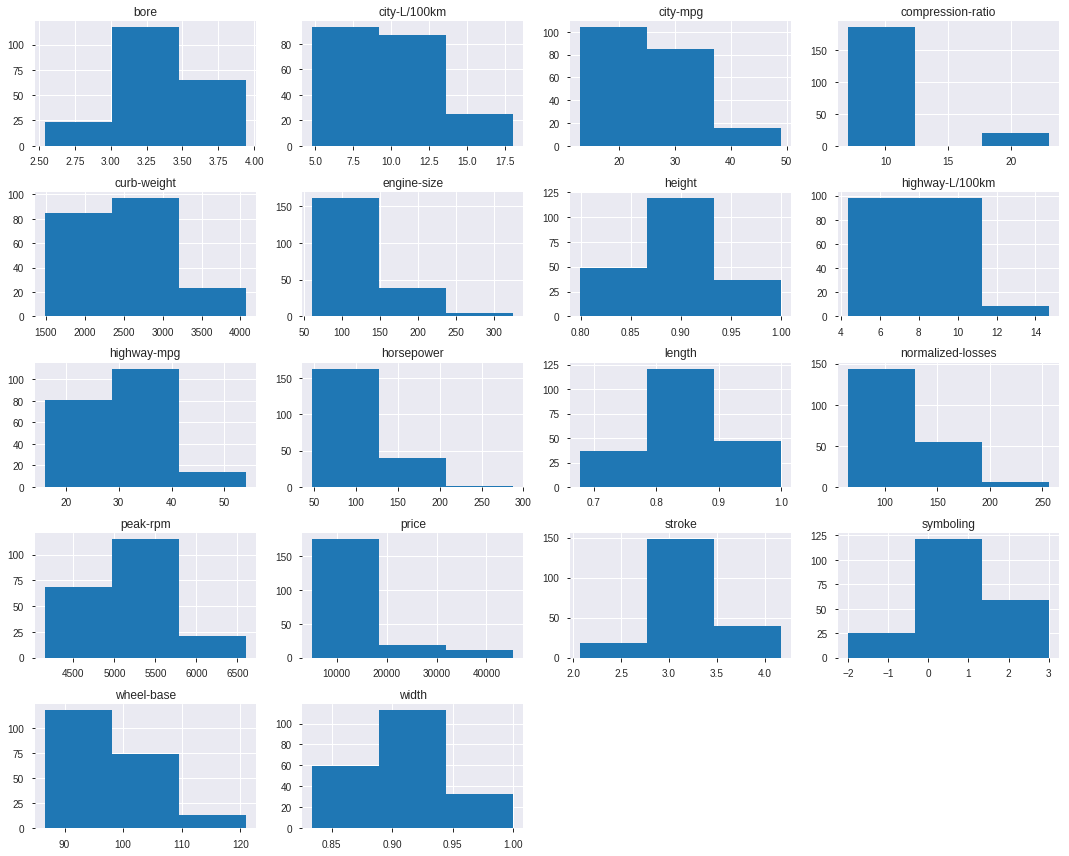

In [25]:
df.hist(bins=3,figsize=(15,12))
plt.tight_layout()

In [26]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower_binned'],
      dtype='object')

**Dummy Variable**
 
 is a numerical variable used to label categories.

In [27]:
dummy_var=pd.get_dummies(df[["fuel-type","aspiration"]])
dummy_var

fuel-type_diesel  fuel-type_gas  aspiration_std  aspiration_turbo
0                   0              1               1                 0
1                   0              1               1                 0
2                   0              1               1                 0
3                   0              1               1                 0
4                   0              1               1                 0
..                ...            ...             ...               ...
200                 0              1               1                 0
201                 0              1               0                 1
202                 0              1               1                 0
203                 1              0               0                 1
204                 0              1               0                 1

[205 rows x 4 columns]

In [28]:
# rename the dummy variable column names
dummy_var.rename(columns = {'fuel-type_gas':'gas','fuel-type_diesel':'diesel','aspiration_std':'std','aspiration_turbo':'turbo'},
                 inplace = True)
dummy_var

diesel  gas  std  turbo
0         0    1    1      0
1         0    1    1      0
2         0    1    1      0
3         0    1    1      0
4         0    1    1      0
..      ...  ...  ...    ...
200       0    1    1      0
201       0    1    0      1
202       0    1    1      0
203       1    0    0      1
204       0    1    0      1

[205 rows x 4 columns]

In [29]:
df=pd.concat([df,dummy_var],axis=1)

df.head()

symboling  normalized-losses         make fuel-type aspiration  \
0          3              122.0  alfa-romero       gas        std   
1          3              122.0  alfa-romero       gas        std   
2          1              122.0  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   city-mpg  highway-mpg    price  city-L/100km highway-L/100km  \
0        21           27  13495.0     11.190476        8.703704   
1        21           27  16500.0     11.190476        8.703704   
2        19           26  16500.0     12.368421        9.038462   
3        24           30  13950.0      9.791667        7.833333   
4        18           22  17450.0     13.055556       10.681818   

  horsepower_binned  diesel gas  std  turbo  
0               low       0   1    1      0  
1               low       0   1    1      0  
2            medium       0   1    1      0  
3               low       0   1    1      0  
4               low       0   1    1      0  

[5 rows x 33 columns]

In [30]:
#drop the unwanted columns as we create the dummy variables for them. 
data=df.drop(df[["fuel-type","aspiration"]],axis=1)
data.head()

symboling  normalized-losses         make num-of-doors   body-style  \
0          3              122.0  alfa-romero          two  convertible   
1          3              122.0  alfa-romero          two  convertible   
2          1              122.0  alfa-romero          two    hatchback   
3          2              164.0         audi         four        sedan   
4          2              164.0         audi         four        sedan   

  drive-wheels engine-location  wheel-base    length     width  ...  city-mpg  \
0          rwd           front        88.6  0.811148  0.886584  ...        21   
1          rwd           front        88.6  0.811148  0.886584  ...        21   
2          rwd           front        94.5  0.822681  0.905947  ...        19   
3          fwd           front        99.8  0.848630  0.915629  ...        24   
4          4wd           front        99.4  0.848630  0.918396  ...        18   

   highway-mpg    price city-L/100km  highway-L/100km horsepower_binned  \
0           27  13495.0    11.190476         8.703704               low   
1           27  16500.0    11.190476         8.703704               low   
2           26  16500.0    12.368421         9.038462            medium   
3           30  13950.0     9.791667         7.833333               low   
4           22  17450.0    13.055556        10.681818               low   

   diesel  gas  std  turbo  
0       0    1    1      0  
1       0    1    1      0  
2       0    1    1      0  
3       0    1    1      0  
4       0    1    1      0  

[5 rows x 31 columns]

In [31]:
dt=data.corr()
# correlation matrix where correlation of price with other variables is greater than 0.5
dt[dt["price"]>0.5]

symboling  normalized-losses  wheel-base    length     width  \
wheel-base       -0.531954          -0.056518    1.000000  0.874587  0.795144   
length           -0.357612           0.019209    0.874587  1.000000  0.841118   
width            -0.232919           0.084195    0.795144  0.841118  1.000000   
curb-weight      -0.227691           0.097785    0.776386  0.877728  0.867032   
engine-size      -0.105790           0.110997    0.569329  0.683360  0.735433   
bore             -0.130083          -0.029266    0.488760  0.606462  0.559152   
horsepower        0.071389           0.203434    0.351957  0.554434  0.642195   
price            -0.082201           0.133999    0.583168  0.682986  0.728699   
city-L/100km      0.063165           0.232682    0.474040  0.659165  0.682850   
highway-L/100km  -0.030190           0.178527    0.578128  0.711597  0.728044   

                   height  curb-weight  engine-size      bore    stroke  ...  \
wheel-base       0.589435     0.776386     0.569329  0.488760  0.160944  ...   
length           0.491029     0.877728     0.683360  0.606462  0.129522  ...   
width            0.279210     0.867032     0.735433  0.559152  0.182939  ...   
curb-weight      0.295572     1.000000     0.850594  0.648485  0.168783  ...   
engine-size      0.067149     0.850594     1.000000  0.583798  0.203094  ...   
bore             0.171101     0.648485     0.583798  1.000000 -0.055909  ...   
horsepower      -0.110137     0.750968     0.810713  0.575737  0.088264  ...   
price            0.134388     0.820825     0.861752  0.532300  0.082095  ...   
city-L/100km    -0.002333     0.791911     0.744952  0.555960  0.042550  ...   
highway-L/100km  0.085892     0.836742     0.777077  0.551943  0.055433  ...   

                 peak-rpm  city-mpg  highway-mpg     price  city-L/100km  \
wheel-base      -0.360704 -0.470414    -0.544082  0.583168      0.474040   
length          -0.287031 -0.670909    -0.704662  0.682986      0.659165   
width           -0.219859 -0.642704    -0.677218  0.728699      0.682850   
curb-weight     -0.266283 -0.757414    -0.797465  0.820825      0.791911   
engine-size     -0.244599 -0.653658    -0.677470  0.861752      0.744952   
bore            -0.254761 -0.584508    -0.586992  0.532300      0.555960   
horsepower       0.130971 -0.803162    -0.770903  0.757917      0.871715   
price           -0.100854 -0.667449    -0.690526  1.000000      0.770411   
city-L/100km     0.120653 -0.950493    -0.928767  0.770411      1.000000   
highway-L/100km  0.016127 -0.908439    -0.951855  0.789346      0.955195   

                 highway-L/100km    diesel       gas       std     turbo  
wheel-base              0.578128  0.308346 -0.308346 -0.257611  0.257611  
length                  0.711597  0.212679 -0.212679 -0.234539  0.234539  
width                   0.728044  0.233880 -0.233880 -0.300567  0.300567  
curb-weight             0.836742  0.217275 -0.217275 -0.324902  0.324902  
engine-size             0.777077  0.069594 -0.069594 -0.108217  0.108217  
bore                    0.551943  0.054457 -0.054457 -0.212623  0.212623  
horsepower              0.801403 -0.165190  0.165190 -0.240182  0.240182  
price                   0.789346  0.110207 -0.110207 -0.177285  0.177285  
city-L/100km            0.955195 -0.235766  0.235766 -0.174182  0.174182  
highway-L/100km         1.000000 -0.153710  0.153710 -0.225795  0.225795  

[10 rows x 22 columns]

In [32]:
dt[dt["price"]<-0.5].T

city-mpg  highway-mpg
symboling         -0.035823     0.034606
normalized-losses -0.218749    -0.178221
wheel-base        -0.470414    -0.544082
length            -0.670909    -0.704662
width             -0.642704    -0.677218
height            -0.048640    -0.107358
curb-weight       -0.757414    -0.797465
engine-size       -0.653658    -0.677470
bore              -0.584508    -0.586992
stroke            -0.042179    -0.043961
compression-ratio  0.324701     0.265201
horsepower        -0.803162    -0.770903
peak-rpm          -0.113723    -0.054257
city-mpg           1.000000     0.971337
highway-mpg        0.971337     1.000000
price             -0.667449    -0.690526
city-L/100km      -0.950493    -0.928767
highway-L/100km   -0.908439    -0.951855
diesel             0.255963     0.191392
gas               -0.255963    -0.191392
std                0.202362     0.254416
turbo             -0.202362    -0.254416

In [33]:
data.describe()

symboling  normalized-losses  wheel-base      length       width  \
count  205.000000         205.000000  205.000000  205.000000  205.000000   
mean     0.834146         122.000000   98.756585    0.836373    0.911588   
std      1.245307          31.681008    6.021776    0.059285    0.029671   
min     -2.000000          65.000000   86.600000    0.678039    0.834025   
25%      0.000000         101.000000   94.500000    0.799135    0.886584   
50%      1.000000         122.000000   97.000000    0.832292    0.905947   
75%      2.000000         137.000000  102.400000    0.879865    0.925311   
max      3.000000         256.000000  120.900000    1.000000    1.000000   

           height  curb-weight  engine-size        bore      stroke  ...  \
count  205.000000   205.000000   205.000000  205.000000  205.000000  ...   
mean     0.898409  2555.565854   126.907317    3.329751    3.255423  ...   
std      0.040862   520.680204    41.642693    0.270844    0.313597  ...   
min      0.799331  1488.000000    61.000000    2.540000    2.070000  ...   
25%      0.869565  2145.000000    97.000000    3.150000    3.110000  ...   
50%      0.904682  2414.000000   120.000000    3.310000    3.290000  ...   
75%      0.928094  2935.000000   141.000000    3.580000    3.410000  ...   
max      1.000000  4066.000000   326.000000    3.940000    4.170000  ...   

          peak-rpm    city-mpg  highway-mpg         price  city-L/100km  \
count   205.000000  205.000000   205.000000    205.000000    205.000000   
mean   5125.369458   25.219512    30.751220  13207.129353      9.949525   
std     476.979093    6.542142     6.886443   7868.768212      2.573104   
min    4150.000000   13.000000    16.000000   5118.000000      4.795918   
25%    4800.000000   19.000000    25.000000   7788.000000      7.833333   
50%    5200.000000   24.000000    30.000000  10595.000000      9.791667   
75%    5500.000000   30.000000    34.000000  16500.000000     12.368421   
max    6600.000000   49.000000    54.000000  45400.000000     18.076923   

       highway-L/100km      diesel         gas         std       turbo  
count       205.000000  205.000000  205.000000  205.000000  205.000000  
mean          8.034347    0.097561    0.902439    0.819512    0.180488  
std           1.849782    0.297446    0.297446    0.385535    0.385535  
min           4.351852    0.000000    0.000000    0.000000    0.000000  
25%           6.911765    0.000000    1.000000    1.000000    0.000000  
50%           7.833333    0.000000    1.000000    1.000000    0.000000  
75%           9.400000    0.000000    1.000000    1.000000    0.000000  
max          14.687500    1.000000    1.000000    1.000000    1.000000  

[8 rows x 22 columns]

In [34]:
data.describe(include='object')

make num-of-doors body-style drive-wheels engine-location  \
count      205          205        205          205             205   
unique      22            2          5            3               2   
top     toyota         four      sedan          fwd           front   
freq        32          116         96          120             202   

       engine-type num-of-cylinders fuel-system  
count          205              205         205  
unique           7                7           8  
top            ohc             four        mpfi  
freq           148              159          94

In [35]:
data["drive-wheels"].value_counts().to_frame().rename(columns={"drive-wheels":"value_counts"})

value_counts
fwd           120
rwd            76
4wd             9

**Groupby Function**

In [36]:
group_data=df[["drive-wheels","body-style","price"]].groupby(by=["drive-wheels","body-style"],as_index=False).mean()
group_data

drive-wheels   body-style         price
0           4wd    hatchback  10405.064677
1           4wd        sedan  12647.333333
2           4wd        wagon   9095.750000
3           fwd  convertible  11595.000000
4           fwd      hardtop   8249.000000
5           fwd    hatchback   8396.387755
6           fwd        sedan   9930.934363
7           fwd        wagon   9997.333333
8           rwd  convertible  23949.600000
9           rwd      hardtop  24202.714286
10          rwd    hatchback  14278.269966
11          rwd        sedan  21711.833333
12          rwd        wagon  16994.222222

**Pivot Table**

In [37]:
group_data.pivot(index="drive-wheels",columns="body-style")

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN  10405.064677  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9930.934363   
rwd              23949.6  24202.714286  14278.269966  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

### Correlation and p value

In [38]:

cols=["wheel-base","bore","horsepower","length","width","height","curb-weight","engine-size","city-mpg","highway-mpg"]
for i in cols:
    pearson_coef,p_value=stats.pearsonr(df[i],df["price"])
    print("For {} :  pearson coefficient= {} and p value={} ".format(i,pearson_coef,p_value))

For wheel-base :  pearson coefficient= 0.5831681499789547 and p value=4.5276255456864967e-20 
For bore :  pearson coefficient= 0.5323000195387408 and p value=2.1398306512854323e-16 
For horsepower :  pearson coefficient= 0.7579169537498177 and p value=1.607670397812937e-39 
For length :  pearson coefficient= 0.6829862954386219 and p value=1.6498873291217276e-29 
For width :  pearson coefficient= 0.7286988175931838 and p value=3.2145204838046134e-35 
For height :  pearson coefficient= 0.1343875187105181 and p value=0.05471982048424375 
For curb-weight :  pearson coefficient= 0.8208247333547292 and p value=2.8663321070267104e-51 
For engine-size :  pearson coefficient= 0.8617522436859721 and p value=9.669661923634464e-62 
For city-mpg :  pearson coefficient= -0.6674492651600005 and p value=8.463700497727248e-28 
For highway-mpg :  pearson coefficient= -0.6905257341183487 and p value=2.2324674058373475e-30 


In [39]:
df_gptest = data[['drive-wheels','body-style','price']]
grouped_test=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test.head()


drive-wheels         price
0            rwd  13495.000000
1            rwd  16500.000000
2            rwd  16500.000000
3            fwd  13950.000000
4            4wd  17450.000000
5            fwd  15250.000000
6            fwd  17710.000000
7            fwd  18920.000000
8            fwd  23875.000000
9            4wd  13207.129353
10           rwd  16430.000000
11           rwd  16925.000000
140          4wd   7603.000000
144          4wd   9233.000000
145          4wd  11259.000000

In [40]:
grouped_test.get_group('4wd')['price']

4      17450.000000
9      13207.129353
140     7603.000000
144     9233.000000
145    11259.000000
148     8013.000000
149    11694.000000
154     7898.000000
155     8778.000000
Name: price, dtype: float64

### Anova

In [41]:
f_val,p_val=stats.f_oneway(grouped_test.get_group('4wd')['price'],grouped_test.get_group('rwd')['price'],grouped_test.get_group('fwd')['price'])
print("F-value is = ",f_val," P-Values is = ",p_val)

F-value is =  67.50366682669117  P-Values is =  3.5392707916047903e-23


In [42]:
f_val,p_val=stats.f_oneway(grouped_test.get_group('4wd')['price'],grouped_test.get_group('rwd')['price'])
print("F-value is = ",f_val," P-Values is = ",p_val)

F-value is =  8.879065438652509  P-Values is =  0.00378273257813761


In [43]:
f_val,p_val=stats.f_oneway(grouped_test.get_group('4wd')['price'],grouped_test.get_group('fwd')['price'])
print("F-value is = ",f_val," P-Values is = ",p_val)

F-value is =  1.1847736755700735  P-Values is =  0.27844756008434524


In [44]:
f_val,p_val=stats.f_oneway(grouped_test.get_group('fwd')['price'],grouped_test.get_group('rwd')['price'])
print("F-value is = ",f_val," P-Values is = ",p_val)

F-value is =  129.41115759339715  P-Values is =  2.6524240289951807e-23


 ## Machine Learning

****MODEL DEVELOPMENT****

### Linear Regression

In [45]:
lm=LinearRegression()
X=df[['highway-mpg']]
Y=df['price']
lm.fit(X,Y)
y_pred=lm.predict(X)
y_pred[0:5]

array([16166.94140528, 16166.94140528, 16955.96802513, 13799.86154571,
       20112.07450456])

In [46]:
print("intercept:",lm.intercept_)
print("coefficient:",lm.coef_)

intercept: 37470.66014138312
coefficient: [-789.02661986]


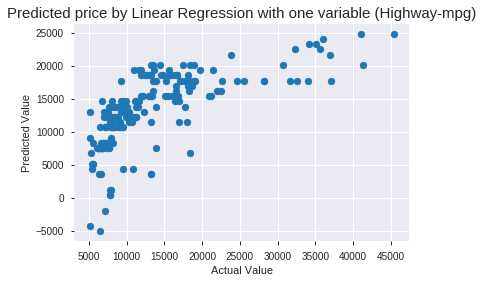

In [47]:
plt.scatter(Y,y_pred)
plt.title("Predicted price by Linear Regression with one variable (Highway-mpg)",fontsize=15)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

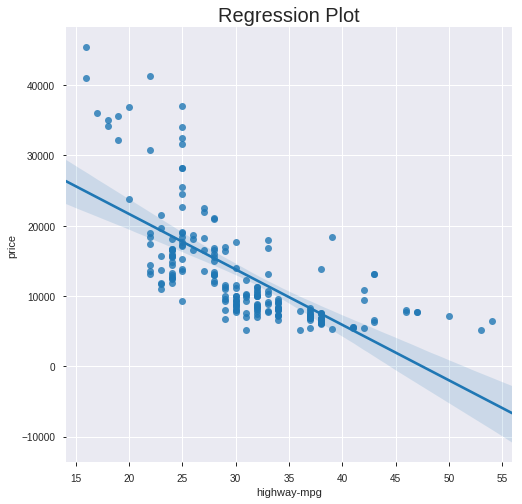

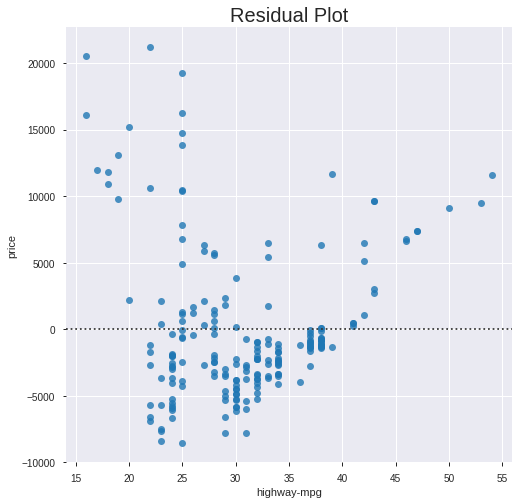

In [48]:
#regression plot
plt.figure(figsize=(8,8))
sns.regplot(x='highway-mpg',y='price',data=df)
plt.title("Regression Plot",fontsize=20)
#plt.ylim(0)
plt.show()

# Residual plot
plt.figure(figsize=(8,8))
sns.residplot(x='highway-mpg',y='price',data=df)
plt.title("Residual Plot",fontsize=20)
plt.show()

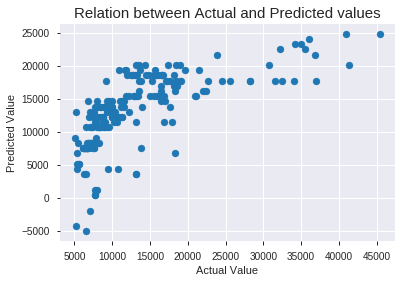

In [49]:
plt.scatter(Y,y_pred)
plt.title("Relation between Actual and Predicted values",fontsize=15)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

In [50]:
r2_score(Y,y_pred)

0.47682578947968457

### Multiple Linear Regression

In [51]:
x = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y= df["price"]
mlr=LinearRegression()
mlr.fit(x,y)
pred_mlr=mlr.predict(x)
pred_mlr[0:5]

array([13857.52067002, 13857.52067002, 17973.17191244, 10572.49349974,
       15912.7292767 ])

In [52]:
print("intercept:",mlr.intercept_)
print("coefficient:",mlr.coef_)

intercept: -9239.379970934511
coefficient: [ 18.12178086   3.80596513 101.121117   -65.10968116]


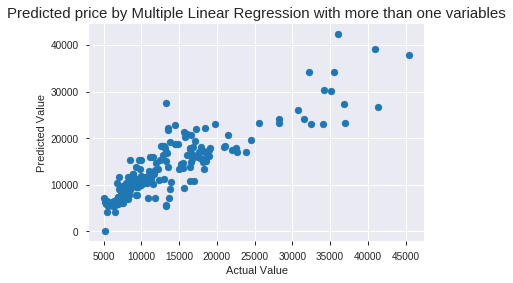

In [53]:
plt.scatter(y,pred_mlr)
plt.title("Predicted price by Multiple Linear Regression with more than one variables",fontsize=15)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

In [54]:
# function to plot the data.
def PollyPlot(model,x,y,name):
    x_new=np.linspace(15,55,100)
    y_new=model(x_new)
    plt.plot(x,y,'.',x_new,y_new,'-')
    plt.xlabel(name)
    plt.ylabel('price of cars')
    plt.show()

In [55]:
x=df["highway-mpg"]
y=df['price']
f=np.polyfit(x,y,3)
p=np.poly1d(f)
print(p)

        3         2
-1.641 x + 213.4 x - 9226 x + 1.402e+05


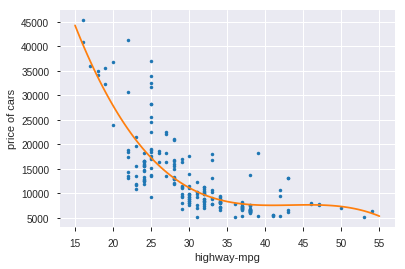

In [56]:
PollyPlot(p,x,y,'highway-mpg')

### Polynomial Linear Regression

We can perform a polynomial transform on multiple features. 

In [57]:
z=df[['horsepower','curb-weight','engine-size','highway-mpg']]
pf=PolynomialFeatures(degree=2)
pf


PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [58]:
z.shape

(205, 4)

In [59]:
z_pf=pf.fit_transform(z)
z_pf

array([[1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.5400e+02, 2.8230e+03, ..., 2.3104e+04, 3.9520e+03,
        6.7600e+02],
       ...,
       [1.0000e+00, 1.3400e+02, 3.0120e+03, ..., 2.9929e+04, 3.9790e+03,
        5.2900e+02],
       [1.0000e+00, 1.0600e+02, 3.2170e+03, ..., 2.1025e+04, 3.9150e+03,
        7.2900e+02],
       [1.0000e+00, 1.1400e+02, 3.0620e+03, ..., 1.9881e+04, 3.5250e+03,
        6.2500e+02]])

In [60]:
plr=LinearRegression()
plr.fit(z_pf,y)
pred_plr=plr.predict(z_pf)

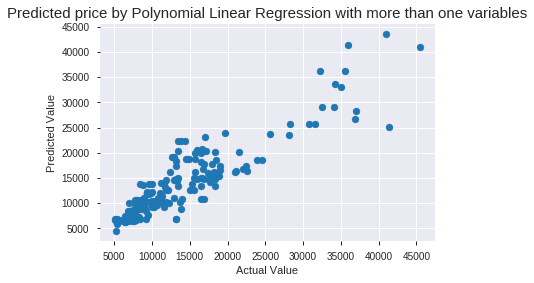

In [61]:
plt.scatter(y,pred_plr)
plt.title("Predicted price by Polynomial Linear Regression with more than one variables",fontsize=15)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

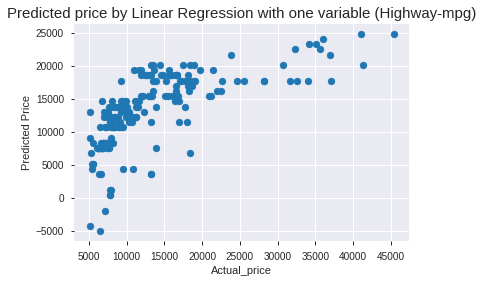

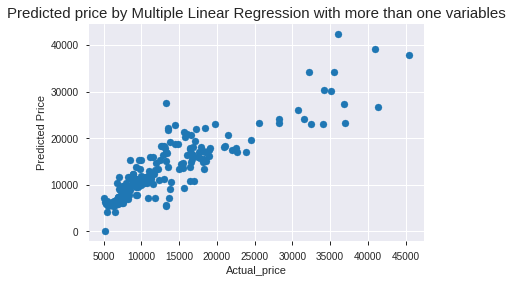

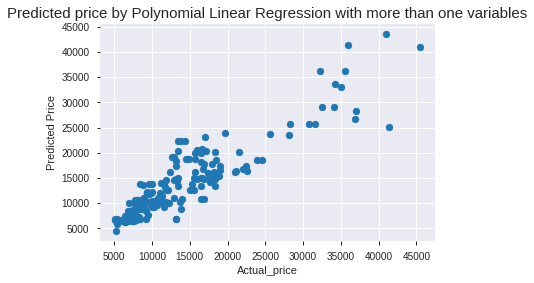

In [62]:
plt.scatter(Y,y_pred)
plt.title("Predicted price by Linear Regression with one variable (Highway-mpg)",fontsize=15)
plt.xlabel("Actual_price")
plt.ylabel("Predicted Price")
plt.show()
plt.scatter(y,pred_mlr)
plt.title("Predicted price by Multiple Linear Regression with more than one variables",fontsize=15)
plt.xlabel("Actual_price")
plt.ylabel("Predicted Price")
plt.show()
plt.scatter(y,pred_plr)
plt.title("Predicted price by Polynomial Linear Regression with more than one variables",fontsize=15)
plt.xlabel("Actual_price")
plt.ylabel("Predicted Price")
plt.show()


In [63]:
# comparison of  r2 score  for MLR and PLR for same data .
print("Multiple Linear Regression R2 Score:\n",r2_score(y,pred_mlr))
print("Polynomial Regression R2 Score:\n",r2_score(y,pred_plr))

Multiple Linear Regression R2 Score:
 0.776210913272399
Polynomial Regression R2 Score:
 0.8331236166523797
